In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.feature_extraction.text import CountVectorizer

讀取的檔案，已經涵蓋了新聞的正負面屬性，今天我們希望找出每篇新聞的關鍵字  
因此除了要做結巴切詞之外，同時也希望得到tf-idf等等資訊  
不過再這之前，我們希望對新聞資訊做一些處理(處理亂碼、標點符號、停用詞等等)  
更進階一點，為了讓結巴切的準確一些，我們可以新增字典，讓結巴沒看過的詞彙也分的出來   

In [40]:
# TSMC_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/LARGAN_Stock.csv')
TSMC_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/Foxconn_Stock.csv')
# TSMC_PRICE = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的股價/TSMC_Stock.csv')


# TSMC_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/LARGAN_NEWS.csv')
TSMC_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/Foxconn_NEWS.csv')
# TSMC_NEWS = pd.read_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/已經標記的新聞/TSMC_NEWS.csv')



In [41]:
TSMC_NEWS

,TITLE,TIME,DESCRIPTION,CONTENT,year,month,day,hour,status
0,柯文哲首度公開表態 「2024沒有意外就會選」,2019-12-11,台北市長柯文哲成立台灣民眾黨，除了準備積極搶攻國會席次外，也被外界視為劍指2024，儘管柯文...,台北市長柯文哲今中午接受台灣藝術台「新聞噹噹噹」專訪時首度表態「2024沒有意外的話會選」。...,2019,12,11,0,0
1,台指期 短線高檔震盪,2019-12-11,"股期雙市昨（11）日震盪收紅，指數齊步力守攻克11,700點關卡。分析師表示，現階段期現貨轉...","股期雙市昨（11）日震盪收紅，指數齊步力守攻克11,700點關卡。分析師表示，現階段期現貨轉...",2019,12,11,0,0
2,韓營擴大造勢拚選票回流 定調決戰高雄,2019-12-11,選戰倒數30天，國民黨總統參選人韓國瑜陣營評估，雲林以北、花東、離島穩定小幅領先，南台灣則較...,選戰倒數30天，國民黨總統參選人韓國瑜陣營評估，雲林以北、花東、離島穩定小幅領先，南台灣則較...,2019,12,11,0,0
3,郭粉挺宋楚瑜 柯文哲：不是敵人就是朋友,2019-12-11,鴻海集團創辦人郭台銘的老虎軍團表態支持宋楚瑜選總統，台北市長柯文哲的幕僚蔡壁如在媒體專訪時表...,鴻海集團創辦人郭台銘的老虎軍團表態支持宋楚瑜選總統，台北市長柯文哲的幕僚蔡壁如在媒體專訪時表...,2019,12,11,0,0
4,【即時短評】柯文哲預告選2024 卻透露民眾黨一個秘密,2019-12-11,2020總統大選，小黨慘遭邊緣化，連民進黨副總統候選人賴清德都公開呼籲「大義滅親」，要支持者...,台北市長柯文哲今天首度證實，沒有意外的話，他會選2024年總統。記者潘俊宏／攝影 分享 ...,2019,12,11,0,0
...,...,...,...,...,...,...,...,...,...
9926,美媒：鴻海宣布威州廠2020年底開始生產,2019-03-19,美國媒體報導，台灣鴻海集團今天宣布，在威斯康辛州的生產設施興建工程今夏動工，預計明年底即可開...,美國媒體報導，台灣鴻海集團今天宣布，在威斯康辛州的生產設施興建工程今夏動工，預計明年底即可開...,2019,3,19,0,0
9927,"鴻海高雄獵地 要找7,000坪",2019-03-19,高雄市長韓國瑜才剛和鴻海集團總裁郭台銘直播合作記者會，立刻展現拚經濟效率，昨（18）日經發局...,報系資料照 分享 facebook \n \n高雄市長韓國瑜才剛和鴻海集團總裁...,2019,3,19,0,0
9928,鴻海宣布：威州面板廠2020年底生產,2019-03-19,鴻海集團旗下富士康科技18日宣布，威斯康辛州面板工廠最晚今夏開始興建，預計2020年底開始生產。,鴻海集團旗下富士康科技18日宣布，威斯康辛州面板工廠最晚今夏開始興建，預計2020年底開始生...,2019,3,19,0,0
9929,貿協國企班新竹媒合會 企業釋千名職缺搶才,2019-03-19,經濟部國際貿易局委託外貿協會辦理培訓中心國際企業經營班（ITI），今年共有318名外貿菁英將...,經濟部國際貿易局委託外貿協會辦理培訓中心國際企業經營班（ITI），今年共有318名外貿菁英將...,2019,3,19,0,0


### 正則表達式把文章弄得好看一點

In [42]:
add_word_list = pd.read_table("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/Jieba自定義字典/Largan＿Dict.txt",header = None)
add_word_list.columns = ['vocab']
add_word_list = list(add_word_list['vocab'])
for i in add_word_list:
    jieba.add_word(i)
    
add_word_list = pd.read_table("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/Jieba自定義字典/TSMC_Dict.txt",header = None)
add_word_list.columns = ['vocab']
add_word_list = list(add_word_list['vocab'])
for i in add_word_list:
    jieba.add_word(i)
    

## 找出正面新聞的重要詞彙

In [43]:
upnews = TSMC_NEWS[TSMC_NEWS['status']==1]
allnews = TSMC_NEWS['CONTENT']
downnews = TSMC_NEWS[TSMC_NEWS['status']==-1]
   
positive_token = []
for goodnews in upnews['CONTENT']:
    goodnews = re.sub(r'[。，（）_?\d]','',goodnews)
    #這邊想再加一行過濾亂碼的條件，但是還沒搞懂
    seg_list = jieba.cut(goodnews)
    token = ' '.join(seg_list)
    positive_token.append(token)

count_vec_pos = CountVectorizer()
good_news_count = count_vec_pos.fit_transform(positive_token)
good_news_corpus = count_vec_pos.get_feature_names() 
good_news_count = pd.DataFrame(good_news_count.toarray(),columns = good_news_corpus)

#-----------------------------

all_token = []
for all_news in allnews:
    all_news = re.sub(r'[。，（）_?\d]','',all_news)
    seg_list = jieba.cut(all_news)
    token = ' '.join(seg_list)
    all_token.append(token)
   
count_vec_all_pos_vocab = CountVectorizer(vocabulary=good_news_corpus)
all_news_count_pos = count_vec_all_pos_vocab.fit_transform(all_token)
all_news_count_pos = pd.DataFrame(all_news_count_pos.toarray(),columns = good_news_corpus)
    
#-----------------------------

negative_token = []
for badnews in downnews['CONTENT']:
    badnews = re.sub(r'[。，（）_?\d]','',badnews)
    seg_list = jieba.cut(badnews)
    token = ' '.join(seg_list)
    negative_token.append(token)

count_vec_neg = CountVectorizer()
bad_news_count = count_vec_neg.fit_transform(negative_token)
bad_news_corpus = count_vec_neg.get_feature_names() 
bad_news_count = pd.DataFrame(bad_news_count.toarray(),columns = bad_news_corpus)

#-----------------------------
   
count_vec_all_neg_vocab = CountVectorizer(vocabulary=bad_news_corpus)
all_news_count_neg = count_vec_all_neg_vocab.fit_transform(all_token)
all_news_count_neg = pd.DataFrame(all_news_count_neg.toarray(),columns = bad_news_corpus)





### 待解決問題：
1.結巴不支援英文，是否用NLTK拉出來處理  
2.stopwords還沒時間搞  
3.組員切出來的自定義辭典不能用(貌似要加詞頻那些)  

In [44]:
all_news_count_pos

,aa,aabc,ab,abf,ac,act,actio,ad,adas,adr,...,龍華,龍華廠,龍虎斑,龍鎮,龍頭,龍黑,龐大,龔明鑫,龔明鑫進,龜山
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
all_news_count_neg

,aa,aacsb,aadr,aai,aaptt,acia,act,ad,adr,aetf,...,黨籍,黨綱,黨部,黨黨,鼓勵,齊為,龍華廠,龐大,龜山,龜山壽山
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9928,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 計算全部新聞和正面新聞的tf-idf / Chi-Square值

### Good news

In [46]:
allnews_tf_dictionary_pos = {}
allnews_df_dictionary_pos = {}


column_name = all_news_count_pos.columns

for i in column_name:
    allnews_tf_dictionary_pos[i] = all_news_count_pos.loc[:,i].sum()
    allnews_df_dictionary_pos[i] = np.count_nonzero(all_news_count_pos.loc[:,i])

all_news_pos_tf = pd.DataFrame.from_dict(allnews_tf_dictionary_pos,orient='index',columns = ['tf_all_news'])
all_news_pos_df = pd.DataFrame.from_dict(allnews_df_dictionary_pos,orient='index',columns = ['df_all_news'])
all_news_pos = pd.concat([all_news_pos_tf,all_news_pos_df],axis = 1)
all_news_pos['tf-idf_all_news'] =(np.log(all_news_count_pos.shape[0])/all_news_pos['df_all_news'])* all_news_pos['tf_all_news']


pos_tf_dictionary = {}
pos_df_dictionary = {}

column_name = good_news_count.columns

for i in column_name:
    pos_tf_dictionary[i] = good_news_count.loc[:,i].sum()
    pos_df_dictionary[i] = np.count_nonzero(good_news_count.loc[:,i])

good_news_tf = pd.DataFrame.from_dict(pos_tf_dictionary,orient='index',columns = ['tf_good_news'])
good_news_df = pd.DataFrame.from_dict(pos_df_dictionary,orient='index',columns = ['df_good_news'])
good_news = pd.concat([good_news_tf,good_news_df],axis = 1)
good_news['tf-idf_good_news'] = (np.log(good_news_count.shape[0])/good_news['df_good_news'])* good_news['tf_good_news']



### Bad news

In [47]:
allnews_tf_dictionary_neg = {}
allnews_df_dictionary_neg = {}


column_name = all_news_count_neg.columns

for i in column_name:
    allnews_tf_dictionary_neg[i] = all_news_count_neg.loc[:,i].sum()
    allnews_df_dictionary_neg[i] = np.count_nonzero(all_news_count_neg.loc[:,i])

all_news_tf = pd.DataFrame.from_dict(allnews_tf_dictionary_neg,orient='index',columns = ['tf_all_news'])
all_news_df = pd.DataFrame.from_dict(allnews_df_dictionary_neg,orient='index',columns = ['df_all_news'])
all_news_neg = pd.concat([all_news_tf,all_news_df],axis = 1)
all_news_neg['tf-idf_all_news'] =(np.log(all_news_count_neg.shape[0])/all_news_neg['df_all_news'])* all_news_neg['tf_all_news']


neg_tf_dictionary = {}
neg_df_dictionary = {}

column_name = bad_news_count.columns

for i in column_name:
    neg_tf_dictionary[i] = bad_news_count.loc[:,i].sum()
    neg_df_dictionary[i] = np.count_nonzero(bad_news_count.loc[:,i])

#把字典弄成dataframe
bad_news_tf = pd.DataFrame.from_dict(neg_tf_dictionary,orient='index',columns = ['tf_bad_news'])
bad_news_df = pd.DataFrame.from_dict(neg_df_dictionary,orient='index',columns = ['df_bad_news'])
bad_news = pd.concat([bad_news_tf,bad_news_df],axis = 1)
bad_news['tf-idf_bad_news'] = (np.log(bad_news_count.shape[0])/bad_news['df_bad_news'])* bad_news['tf_bad_news']



In [48]:
TSMCtext_pos = pd.concat([good_news,all_news_pos],axis = 1,ignore_index=True)
TSMCtext_pos.columns = list(good_news.columns)+list(all_news_pos)
TSMCtext_pos['總新聞數'] = all_news_count_pos.shape[0]
TSMCtext_pos['好新聞數'] = good_news_count.shape[0]
TSMCtext_pos['tf期望值'] = TSMCtext_pos['tf_all_news']/all_news＿count_pos.shape[0]
TSMCtext_pos['df期望值'] = TSMCtext_pos['df_all_news']/all_news＿count_pos.shape[0]
TSMCtext_pos['MI'] = TSMCtext_pos['df_good_news'] / (TSMCtext_pos['總新聞數']*TSMCtext_pos['df_all_news'])
TSMCtext_pos['MI*tf-idf'] = TSMCtext_pos['MI']*TSMCtext_pos['tf-idf_good_news']
TSMCtext_pos['tf卡方值'] = np.square(TSMCtext_pos['tf_good_news']-TSMCtext_pos['tf期望值'])/TSMCtext_pos['tf期望值']
TSMCtext_pos['df卡方值'] = np.square(TSMCtext_pos['df_good_news']-TSMCtext_pos['df期望值'])/TSMCtext_pos['df期望值']
TSMCtext_pos['df卡方*tf-idf'] = TSMCtext_pos['df卡方值']*TSMCtext_pos['tf-idf_good_news']
TSMCtext_pos['lift'] = (TSMCtext_pos['df_good_news']/TSMCtext_pos['好新聞數'])/(TSMCtext_pos['df_all_news']/TSMCtext_pos['總新聞數'])





In [49]:
TSMCtext_neg = pd.concat([bad_news,all_news_neg],axis = 1,ignore_index=True)
TSMCtext_neg.columns = list(bad_news.columns)+list(all_news_neg)
TSMCtext_neg['總新聞數'] = all_news_count_neg.shape[0]
TSMCtext_neg['壞新聞數'] = bad_news_count.shape[0]
TSMCtext_neg['tf期望值'] = TSMCtext_neg['tf_all_news']/all_news＿count_neg.shape[0]
TSMCtext_neg['df期望值'] = TSMCtext_neg['df_all_news']/all_news＿count_neg.shape[0]
TSMCtext_neg['MI'] = TSMCtext_neg['df_bad_news'] / (TSMCtext_neg['總新聞數']*TSMCtext_neg['df_all_news'])
TSMCtext_neg['MI*tf-idf'] = TSMCtext_neg['MI']*TSMCtext_neg['tf-idf_bad_news']
TSMCtext_neg['tf卡方值'] = np.square(TSMCtext_neg['tf_bad_news']-TSMCtext_neg['tf期望值'])/TSMCtext_neg['tf期望值']
TSMCtext_neg['df卡方值'] = np.square(TSMCtext_neg['df_bad_news']-TSMCtext_neg['df期望值'])/TSMCtext_neg['df期望值']
TSMCtext_neg['df卡方*tf-idf'] = TSMCtext_neg['df卡方值']*TSMCtext_neg['tf-idf_bad_news']
TSMCtext_neg['lift'] = (TSMCtext_neg['df_bad_news']/TSMCtext_neg['壞新聞數'])/(TSMCtext_neg['df_all_news']/TSMCtext_neg['總新聞數'])




In [50]:
TSMCtext_pos['mix'] = TSMCtext_pos['MI']*TSMCtext_pos['df卡方*tf-idf']
TSMCtext_neg['mix'] = TSMCtext_neg['MI']*TSMCtext_neg['df卡方*tf-idf']

### 基本訊息都處理好了，接下來就是挑選關鍵字，並且以這些關鍵字為每一篇文章貼上正面分數和負面分數

In [51]:
TSMCtext_pos.sort_values(by = 'mix',ascending=False).head(15)['mix']
TSMCtext_neg.sort_values(by = 'mix',ascending=False).head(15)['mix']


ndy        79.490587
umsci      73.375926
楊瓊瓔        73.375926
壽山         48.917284
郭王會        39.996418
dollars    36.687963
曾健         36.687963
uyahoo     31.305485
逐鹿         30.573303
近王         30.573303
kuso       30.573303
一打         24.458642
故居         24.458642
慶興         24.458642
labs       24.458642
Name: mix, dtype: float64

In [22]:
final_positive_token = np.array(TSMCtext_pos.sort_values(by = 'mix',ascending=False).head(1000).index)
final_negative_token = np.array(TSMCtext_neg.sort_values(by = 'mix',ascending=False).head(1000).index)

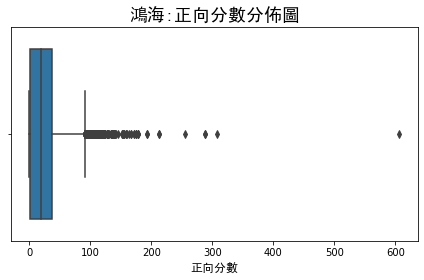

In [23]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(6, 4),tight_layout=True)
all_news_pos_score = all_news_count_pos[final_positive_token].sum(axis = 1)
all_news_neg_score = all_news_count_neg[final_negative_token].sum(axis = 1)

sns.boxplot(all_news_pos_score)
all_news_pos_score.describe()
plt.title('鴻海:正向分數分佈圖',fontproperties=font,fontsize=18)
plt.xlabel('正向分數',fontproperties=font,fontsize=12)

plt.savefig('鴻海:正向分數分佈圖.png',tight_layout=True)



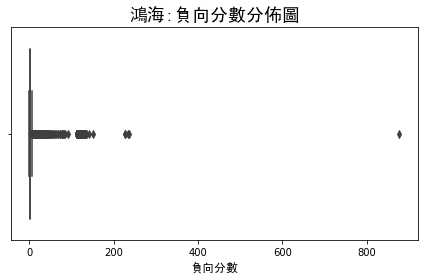

In [24]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(6, 4),tight_layout=True)
all_news_pos_score = all_news_count_pos[final_positive_token].sum(axis = 1)
all_news_neg_score = all_news_count_neg[final_negative_token].sum(axis = 1)

sns.boxplot(all_news_neg_score)
all_news_neg_score.describe()
plt.title('鴻海:負向分數分佈圖',fontproperties=font,fontsize=18)
plt.xlabel('負向分數',fontproperties=font,fontsize=12)

plt.savefig('鴻海:負向分數分佈圖.png',tight_layout=True)




### 發現df卡方 x tf-idf 會表現最好

因此輸出重要的正負向情緒字各1000個

In [25]:
fp = open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/鴻海_token_2000.txt", "w")
 
# 寫入 all_tokens 到檔案
for token in final_positive_token:
    fp.writelines(token)
    fp.writelines('\n')
# 關閉檔案
fp.close()

fp = open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/鴻海_token_2000.txt", "a")

for token in final_negative_token:
    fp.writelines(token)
    fp.writelines('\n')

fp.close()

### 在還沒有斷詞斷乾淨前，就姑且以「df卡方 x tf-idf」這個標準挑選前500個詞來給每篇文章正面和負面分數

In [26]:
positive_score = all_news_count_pos[final_positive_token].sum(axis = 1)
negative_score  = all_news_count_neg[final_negative_token].sum(axis = 1)
TSMC_NEWS['positive_score'] = positive_score
TSMC_NEWS['negative_score'] = negative_score
TSMC_NEWS['emotional_score'] = TSMC_NEWS['positive_score'] - TSMC_NEWS['negative_score']

In [27]:
TSMC_NEWS[TSMC_NEWS['status']==1]['emotional_score'].describe()

count    622.000000
mean      39.147910
std       39.659387
min     -271.000000
25%       19.000000
50%       36.000000
75%       55.000000
max      291.000000
Name: emotional_score, dtype: float64

In [28]:
TSMC_NEWS[TSMC_NEWS['status']==0]['emotional_score'].describe()

count    8856.000000
mean       17.272471
std        22.132376
min       -74.000000
25%         0.000000
50%        13.000000
75%        31.000000
max       226.000000
Name: emotional_score, dtype: float64

In [29]:
TSMC_NEWS[TSMC_NEWS['status']==-1]['emotional_score'].describe()

count    453.000000
mean      -4.578366
std       11.862455
min      -61.000000
25%       -3.000000
50%        0.000000
75%        0.000000
max       50.000000
Name: emotional_score, dtype: float64

有了每天文章的分數，再來就是要和股價呼應了，每日股價都應該會有一排該日所有文章的「情緒分數」

In [30]:
TSMC_PRICE.rename(columns={'日期':'TIME'}, inplace=True)

In [31]:
TSMC_PRICE

,TIME,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,status
0,2018-03-01,42073991.0,3.698227e+09,87.8,88.3,87.5,87.9,-0.2,"16,467",0
1,2018-03-02,28180553.0,2.461227e+09,87.2,87.8,87.0,87.8,-0.1,"13,846",0
2,2018-03-05,31341174.0,2.738562e+09,87.7,88.1,87.0,87.0,-0.8,"15,273",0
3,2018-03-06,35392520.0,3.124639e+09,88.3,88.8,87.8,88.2,1.2,"14,546",0
4,2018-03-07,44181640.0,3.940688e+09,88.6,90.1,88.3,88.5,0.3,"21,638",0
...,...,...,...,...,...,...,...,...,...,...
505,2019-10-25,35866261.0,2.871800e+09,80.7,80.7,79.6,80.2,-0.3,"14,070",0
506,2019-10-28,24589303.0,1.976884e+09,80.5,80.8,80.0,80.1,-0.1,"11,179",0
507,2019-10-29,43338927.0,3.501792e+09,80.1,81.4,80.1,80.8,0.7,"18,579",0
508,2019-10-30,31199154.0,2.503835e+09,80.9,80.9,79.7,80.2,-0.6,"12,486",0


In [32]:
TSMC_NEWS['TIME'] =  pd.to_datetime(TSMC_NEWS['TIME'], format='%Y/%m/%d')
TSMC_PRICE['TIME'] =  pd.to_datetime(TSMC_PRICE['TIME'], format='%Y/%m/%d')


由於今天的新聞，你只能獲得前n天的股價資訊，而不會得知「當天的」任何市場資訊  
因此我在處理該篇新聞的其他衍生數據時，要concat的是前幾天的股市資訊  

In [33]:
import time
from datetime import datetime, date, time, timedelta
def time_shift(df,n):
    df = df.set_index('TIME')
    df = df.shift(n)
    df = df.reset_index()
    return df
    
TSMC_PRICE_d1 = time_shift(TSMC_PRICE,1)
TSMC_PRICE_d2 = time_shift(TSMC_PRICE,2)
TSMC_PRICE_d3 = time_shift(TSMC_PRICE,3)
# temp1 = pd.merge(TSMC_PRICE_d1,TSMC_PRICE_d2,how = 'inner',on='TIME')
# temp2 = pd.merge(temp1,TSMC_PRICE_d3,how = 'inner',on='TIME')
# TSMC_PRICE = temp2

In [34]:
TSMC_PRICE_d1.drop(columns = ['status','TIME'],inplace = True)
TSMC_PRICE_d2.drop(columns = ['status','TIME'],inplace = True)
TSMC_PRICE_d3.drop(columns = ['status','TIME'],inplace = True)
output = pd.concat([TSMC_PRICE_d1,TSMC_PRICE_d2,TSMC_PRICE_d3],axis = 1)


In [35]:
output.columns = ['成交股數_d1','成交金額_d1','開盤價_d1','最高價_d1','最低價_d1','收盤價_d1','漲跌價差_d1','成交筆數_d1',
                  '成交股數_d2','成交金額_d2','開盤價_d2','最高價_d2','最低價_d2','收盤價_d2','漲跌價差_d2','成交筆數_d2',
                 '成交股數_d3','成交金額_d3','開盤價_d3','最高價_d3','最低價_d3','收盤價_d3','漲跌價差_d3','成交筆數_d3']
# output['成交筆數_d1'] = output['成交筆數_d1'].apply(lambda x: x.replace(',',''))

output['TIME'] = TSMC_PRICE['TIME']
output['status'] = TSMC_PRICE['status']

In [36]:
output.head()

,成交股數_d1,成交金額_d1,開盤價_d1,最高價_d1,最低價_d1,收盤價_d1,漲跌價差_d1,成交筆數_d1,成交股數_d2,成交金額_d2,...,成交股數_d3,成交金額_d3,開盤價_d3,最高價_d3,最低價_d3,收盤價_d3,漲跌價差_d3,成交筆數_d3,TIME,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-01,0
1,42073991.0,3.698227e+09,87.8,88.3,87.5,87.9,-0.2,"16,467",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-02,0
2,28180553.0,2.461227e+09,87.2,87.8,87.0,87.8,-0.1,"13,846",42073991.0,3.698227e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-05,0
3,31341174.0,2.738562e+09,87.7,88.1,87.0,87.0,-0.8,"15,273",28180553.0,2.461227e+09,...,42073991.0,3.698227e+09,87.8,88.3,87.5,87.9,-0.2,"16,467",2018-03-06,0
4,35392520.0,3.124639e+09,88.3,88.8,87.8,88.2,1.2,"14,546",31341174.0,2.738562e+09,...,28180553.0,2.461227e+09,87.2,87.8,87.0,87.8,-0.1,"13,846",2018-03-07,0


每篇新聞都有emotional score了，但是每天的emotional score集合  
對每天的股市估算出一個average_emotional_score  
但後來也沒用到  

In [37]:
emotional_score ={}
positive_score = {}
negative_score = {}

for i in output['TIME']:
    try:
        emotional_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['emotional_score'].mean()
        positive_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['positive_score'].mean()
        negative_score[i] = TSMC_NEWS.groupby('TIME').get_group(i)['negative_score'].mean()
        
    except :
        emotional_score[i] = 0
        positive_score[i] = 0
        negative_score[i] = 0
emotional_score = pd.DataFrame.from_dict(emotional_score,orient='index').reset_index()
emotional_score.columns=['TIME','emotional_score']
emotional_score['emotional_score_d1'] = emotional_score.emotional_score.shift(1) #因為只能給今天看到前n天的資訊，故要shift(n)
emotional_score['emotional_score_d2'] = emotional_score.emotional_score.shift(2) 
emotional_score['emotional_score_d3'] = emotional_score.emotional_score.shift(3) 
emotional_score.drop(columns=['emotional_score'],inplace = True) 

positive_score = pd.DataFrame.from_dict(positive_score,orient='index').reset_index()
positive_score.columns=['TIME','positive_score']
positive_score['positive_score_d1'] = positive_score.positive_score.shift(1)
positive_score['positive_score_d2'] = positive_score.positive_score.shift(2)
positive_score['positive_score_d3'] = positive_score.positive_score.shift(3)
positive_score.drop(columns=['positive_score'],inplace = True) 

negative_score = pd.DataFrame.from_dict(negative_score,orient='index').reset_index()
negative_score.columns=['TIME','negative_score']
negative_score['negative_score_d1'] = negative_score.negative_score.shift(1)
negative_score['negative_score_d2'] = negative_score.negative_score.shift(2)
negative_score['negative_score_d3'] = negative_score.negative_score.shift(3)
negative_score.drop(columns=['negative_score'],inplace = True) 


temp1 = pd.merge(output,emotional_score,how='inner',on=['TIME'])
temp2 = pd.merge(temp1,positive_score,how='inner',on=['TIME'])
temp3 = pd.merge(temp2,negative_score,how='inner',on=['TIME'])
temp3     


,成交股數_d1,成交金額_d1,開盤價_d1,最高價_d1,最低價_d1,收盤價_d1,漲跌價差_d1,成交筆數_d1,成交股數_d2,成交金額_d2,...,status,emotional_score_d1,emotional_score_d2,emotional_score_d3,positive_score_d1,positive_score_d2,positive_score_d3,negative_score_d1,negative_score_d2,negative_score_d3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42073991.0,3.698227e+09,87.8,88.3,87.5,87.9,-0.2,"16,467",NaN,NaN,...,0,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
2,28180553.0,2.461227e+09,87.2,87.8,87.0,87.8,-0.1,"13,846",42073991.0,3.698227e+09,...,0,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
3,31341174.0,2.738562e+09,87.7,88.1,87.0,87.0,-0.8,"15,273",28180553.0,2.461227e+09,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,35392520.0,3.124639e+09,88.3,88.8,87.8,88.2,1.2,"14,546",31341174.0,2.738562e+09,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,40227260.0,3.240812e+09,80.9,81.2,80.2,80.5,0.0,"16,658",89180610.0,7.144162e+09,...,0,34.125000,36.826087,37.000000,35.625000,38.739130,38.421053,1.500000,1.913043,1.421053
506,35866261.0,2.871800e+09,80.7,80.7,79.6,80.2,-0.3,"14,070",40227260.0,3.240812e+09,...,0,37.000000,34.125000,36.826087,39.666667,35.625000,38.739130,2.666667,1.500000,1.913043
507,24589303.0,1.976884e+09,80.5,80.8,80.0,80.1,-0.1,"11,179",35866261.0,2.871800e+09,...,0,30.692308,37.000000,34.125000,33.076923,39.666667,35.625000,2.384615,2.666667,1.500000
508,43338927.0,3.501792e+09,80.1,81.4,80.1,80.8,0.7,"18,579",24589303.0,1.976884e+09,...,0,26.833333,30.692308,37.000000,30.833333,33.076923,39.666667,4.000000,2.384615,2.666667


把結果輸出成新的NEWS和新的price

In [38]:
TSMC_NEWS.to_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的新聞/Foxconn_NEWS.csv',index=None)
temp3.to_csv('/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的股價/Foxconn_Stock.csv',index=None)


剩下的我們到建模型那塊再講吧

### 將斷詞的詞寫入txt

In [ ]:
# all_tokens = list(TSMCtext.sort_values(by = 'MI',ascending=False).index)

# # fp = open("/Users/liaoshousan/Desktop/RLSD_PROJECT-StockPrice Prediction/斷出來的詞/tokenize_result_Largan.txt", "a")
 
# # 寫入 all_tokens 到檔案
# for token in all_tokens:
#     fp.writelines(token)
#     fp.writelines('\n')
    
 
# # 關閉檔案
# fp.close()